## Rendimiento de los Estudiantes - Análisis Exploratorio de Datos (EDA)

En esta actividad realizaremos un análisis sobre un conjunto de datos que contiene información relacionada con los estudiantes. El objetivo de este análisis es comprender los factores que influyen en el rendimiento académico de los estudiantes, así como determinar las características, tendencias y patrones presentes en el conjunto de datos. En este análisis también se abordan aspectos relacionados con la limpieza y preparación de los datos previos al análisis propiamente dicho.

# Librerías

Las librerías que vamos a utilizar para el desarrollo del ejercicio son:

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


#Configuración Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","purple","#fcbf49"]
sns.set_theme( palette= palette, context= "notebook")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis Exploratorio de Datos
Comenzaremos realizando el análisis exploratorio de datos con la finalidad de identificar valores faltantes, nulos y valores atípicos para poder tratarlos. Además, tenemos como objetivo en esta etapa comprender a fondo nuestro conjunto de datos y explorar posibles patrones, tendencias y relaciones que puedan haber entre las variables.

## 1.1 Ingesta de Datos
Vamos a ingresar los datos que van a ser utilizados para el análisis y posterior construcción de los modelos. El archivo se encuentra en formato *csv*.

In [2]:
# Ingresamos los datos del archivo csv a un DataFrame de pandas
# ==============================================================================

df = pd.read_csv('Student_performance_data _.csv', 
                 header=0
                 )
print(f'El tamaño del DataFrame es de:  {df.shape[0]} filas y  {df.shape[1]} columnas.')
df.head()


El tamaño del DataFrame es de:  2392 filas y  15 columnas.


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Como podemos observar, el conjunto de datos contiene 2,382 observaciones y 15 columnas, las cuales son:

In [3]:
# Imprimimos los nombres de las columnas del DataFrame
# ==============================================================================

for i in df.columns:
    print(i)

StudentID
Age
Gender
Ethnicity
ParentalEducation
StudyTimeWeekly
Absences
Tutoring
ParentalSupport
Extracurricular
Sports
Music
Volunteering
GPA
GradeClass


Vamos a cambiar los nombres de las variables:

In [4]:
# Cambiamos los nombres de las columnas para que sean más descriptivos
# ==============================================================================

df.rename(columns={'StudentID':'id_estudiante', 
                   'Age':'edad', 
                   'Gender':'genero', 
                   'Ethnicity':'etnia',
                   'ParentalEducation':'educacion_padres',
                   'StudyTimeWeekly':'tiempo_estudio_semanal',
                   'Absences':'ausencias',
                   'Tutoring':'tutorias',
                   'ParentalSupport':'apoyo_padres',
                   'Extracurricular':'extra_curricular_otro',
                   'Sports':'extracurricular_deportes',
                   'Music':'extracurricular_musica',
                   'Volunteering':'extracurricular_voluntariado',
                   'GPA':'promedio',
                   'GradeClass':'calificacion'}, 
          inplace = True
          )

df.head()

,id_estudiante,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Una vez modificados los nombres de las variables, vamos a definir el significado de cada variable:

- **id_estudiante**: Es un identificador único asignado a cada estudiante, comenzando por 1001.

- **edad**: Indica la edad que tiene cada estudiante que ha sido registrado en el conjunto de datos.

- **género**: Indica el género de los estudiantes, donde 0 representa Masculino y 1 representa Femenino.

- **etnia**: Se refiere al origen étnico que tiene cada estudiante, codificado de la siguiente forma:
    - 0: Caucásico.
    - 1: Afroamericano.
    - 2: Asiático.
    - 3: Otros.

- **educación_padres**: Indica el nivel de educación que tienen los padres, codificado de la siguiente forma:
    - 0: Ninguno.
    - 1: Escuela Secundaria.
    - 2: Alguna formación en la Universidad.
    - 3: Licenciatura.
    - 4: Más alto.

- **tiempo_estudio_semanal**: Indica el tiempo semanal en horas que invierte cada estudiante en su formación.

- **ausencias**: Se refiere al número de ausencias que ha tenido el estudiante durante el curso.

- **tutorías**: Indica si recibe tutorías, donde 0 indica que No y 1 indica que Sí.

- **apoyo_padres**: Es el nivel de apoyo que recibe de los padres, se codifica de la siguiente manera:
    - 0: Ninguno.
    - 1: Bajo.
    - 2: Moderado.
    - 3: Alto.
    - 4: Muy Alto.

- **extracurricular_otro**: Indica la participación en actividades extracurriculares diferentes a las mencionadas en el conjunto de datos, donde 0 indica No y 1 indica Sí

- **extracurricular_deportes**: Se refiere a si el estudiante participa en deportes, donde 0 indica que No y 1 indica que Sí.

- **extracurricular_música**: Indica si participa en actividades musicales, donde 0 indica No y 1 indica que Sí.

- **extracurricular_voluntariado**: Participa en voluntariado, donde 0 indica No y 1 indica que Sí.

- **promedio**: Indica el promedio de las calificaciones de los estudiantes.

- **calificación**: Indica la calificación de los estudiantes en función del promedio, donde:
    - 0: 'A' (promedio >= 3.5)
    - 1: 'B' (3.0 <= promedio < 3.5)
    - 2: 'C' (2.5 <= promedio < 3.0)
    - 3: 'D' (2.0 <= promedio < 2.5)
    - 4: 'F' (promedio < 2.0)

## 1.2 Resúmenes de datos
A continuación vamos a obtener los resúmenes descriptivos del conjunto de datos para comenzar a comprender sus principales características.

In [5]:
# Obtenemos información general del DataFrame con el método info
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_estudiante                 2392 non-null   int64  
 1   edad                          2392 non-null   int64  
 2   genero                        2392 non-null   int64  
 3   etnia                         2392 non-null   int64  
 4   educacion_padres              2392 non-null   int64  
 5   tiempo_estudio_semanal        2392 non-null   float64
 6   ausencias                     2392 non-null   int64  
 7   tutorias                      2392 non-null   int64  
 8   apoyo_padres                  2392 non-null   int64  
 9   extra_curricular_otro         2392 non-null   int64  
 10  extracurricular_deportes      2392 non-null   int64  
 11  extracurricular_musica        2392 non-null   int64  
 12  extracurricular_voluntariado  2392 non-null   int64  
 13  pro

## 1.3 Preparación de datos
A continuación vamos a preparar los datos para su posterior análisis. 

### 1.3.1 Valores Faltantes
A continuación vamos a comprobar si tenemos valores faltantes en alguna variable de nuestro conjunto de datos.

In [6]:
# Comprobamos si hay valores nulos en el DataFrame
# ==============================================================================

df.isna().sum()

id_estudiante                   0
edad                            0
genero                          0
etnia                           0
educacion_padres                0
tiempo_estudio_semanal          0
ausencias                       0
tutorias                        0
apoyo_padres                    0
extra_curricular_otro           0
extracurricular_deportes        0
extracurricular_musica          0
extracurricular_voluntariado    0
promedio                        0
calificacion                    0
dtype: int64

Podemos observar que el conjunto de datos no presenta valores faltantes.

### 1.3.2 Valores Duplicados

Vamos a comprobar si hay valores duplicados en nuestro conjunto de datos según la variable *id_estudiante*.

In [7]:
# Comprobamos si hay valores duplicados en el DataFrame 
# ==============================================================================

df.duplicated(subset= 'id_estudiante').sum()

0

En el DataFrame no hay presencia de valores duplicados según la variable *id_estudiante*.


### 1.3.3 Transformación de características

Podemos observar que algunas variables de nuestro conjunto de datos son variables categóricas, como lo son:

- género
- etnia
- educación_padres
- tutorías
- apoyo_padres
- extracurricular_otro
- extracurricular_deportes
- extracurricular_música
- extracurricular_voluntariado

Sin embargo, son representadas numéricamente, por lo cual vamos a proceder a comprobar cómo son reconocidas por la librería de pandas en el DataFrame:

In [8]:
# Verificamos el tipo de dato de cada columna del DataFrame
# ==============================================================================

df.dtypes

id_estudiante                     int64
edad                              int64
genero                            int64
etnia                             int64
educacion_padres                  int64
tiempo_estudio_semanal          float64
ausencias                         int64
tutorias                          int64
apoyo_padres                      int64
extra_curricular_otro             int64
extracurricular_deportes          int64
extracurricular_musica            int64
extracurricular_voluntariado      int64
promedio                        float64
calificacion                    float64
dtype: object

Podemos observar que las variables que representan categorías están siendo representadas como valores enteros en lugar de como categorías. Por lo tanto, vamos a realizar la conversión de cada una de las variables categóricas para que sean reconocidas como tal. De esta forma, podremos realizar nuestro análisis adecuadamente.

- conversión de la variable *género*

In [9]:
# Convertimos la columna 'genero' a categórica y asignamos las categorías 'masculino' y 'femenino'
# ==============================================================================

df['genero'] = df['genero'].map({0:'masculino', 1:'femenino'}).astype('category')

- Conversión de la variable *etnia*

In [10]:
# Convertimos la columna 'etnia' a categórica y asignamos las categorías 'caucasico', 'afroamericano', 'asiatico' y 'otro'
# ==============================================================================

df['etnia'] = df['etnia'].map({0:'caucasico', 1:'afroamericano', 2:'asiatico', 3:'otro'}).astype('category')

- Conversión de *educación_padres*

In [11]:
# Convertimos la columna 'educacion_padres' a categórica y asignamos las categorías 'ninguno', 'escuela_secundaria', 'formacion_universitaria', 'licenciatura' y 'mas_alto'
# ==============================================================================

df['educacion_padres'] = df['educacion_padres'].map({0:'ninguno', 1:'escuela_secundaria', 2:'formacion_universitaria', 3:'licenciatura', 4: 'mas_alto'}).astype('category')

-  Conversión de *tutorías*

In [12]:
# Convertimos la columna 'tutorias' a categórica y asignamos las categorías 'no' y 'si'
# ==============================================================================

df['tutorias'] = df['tutorias'].map({0:'no', 1:'si'}).astype('category')

- Conversión *apoyo_padres*

In [13]:
# Convertimos la columna 'apoyo_padres' a categórica y asignamos las categorías 'ninguno', 'bajo', 'moderado', 'alto' y 'muy_alto'
# ==============================================================================

df['apoyo_padres'] = df['apoyo_padres'].map({0 : 'ninguno', 1 : 'bajo', 2 : 'moderado', 3 : 'alto', 4 : 'muy_alto' }).astype('category')

- Conversión de *extracurricular_otro, extracurricular_deportes, extracurricular_música y extracurricular_voluntariado*

In [14]:
# Convertimos la columna 'extra_curricular_otro', 'extracurricular_deportes', 'extracurricular_musica' y 'extracurricular_voluntariado' a categóricas y asignamos las categorías 'no' y 'si'
# ==============================================================================

df['extra_curricular_otro'] = df['extra_curricular_otro'].map({0 : 'no', 1 : 'si'}).astype('category')
df['extracurricular_deportes'] = df['extracurricular_deportes'].map({0 : 'no', 1 : 'si'}).astype('category')
df['extracurricular_musica'] = df['extracurricular_musica'].map({0 : 'no', 1 : 'si'}).astype('category')
df['extracurricular_voluntariado'] = df['extracurricular_voluntariado'].map({0 : 'no', 1 : 'si'}).astype('category')

Con respecto a la variable calificación, vamos a realizar la conversión a las letras correspondientes al promedio. Sin embargo, primero vamos a comprobar que se cumplan los rangos establecidos en la documentación del conjunto de datos. Según la documentación, la variable calificación debe tener los siguientes valores:

- 0: 'A' (promedio >= 3.5)
- 1: 'B' (3.0 <= promedio < 3.5)
- 2: 'C' (2.5 <= promedio < 3.0)
- 3: 'D' (2.0 <= promedio < 2.5)
- 4: 'F' (promedio < 2.0)

In [15]:
# Comprobamos que la variable calificación este correctamente categorizada
# ==============================================================================

df[((df['promedio'] >= 3.5) & (df['calificacion'] != 0)) | 
   (((df['promedio'] >= 3.0) & (df['promedio'] < 3.5))  & (df['calificacion'] != 1)) |
   (((df['promedio'] >= 2.5) & (df['promedio'] < 3.0))  & (df['calificacion'] != 2)) |
   (((df['promedio'] >= 2.0) & (df['promedio'] < 2.5))  & (df['calificacion'] != 3)) |
   ((df['promedio'] < 2.0) & (df['calificacion'] != 4))]

,id_estudiante,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion
2176,3177,18,femenino,caucasico,formacion_universitaria,17.528419,3,no,alto,no,no,si,no,3.137624,3.0
2177,3178,18,masculino,asiatico,escuela_secundaria,4.033104,3,si,alto,no,no,no,si,3.189217,2.0
2178,3179,17,femenino,afroamericano,mas_alto,1.564842,14,no,bajo,no,si,no,no,1.795369,3.0
2179,3180,18,femenino,afroamericano,formacion_universitaria,15.762379,14,no,moderado,si,si,no,no,2.435958,4.0
2181,3182,15,masculino,asiatico,escuela_secundaria,3.253044,13,si,bajo,no,no,no,no,1.844056,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,femenino,caucasico,licenciatura,10.680555,2,no,muy_alto,si,no,no,no,3.455509,0.0
2388,3389,17,masculino,caucasico,escuela_secundaria,7.583217,4,si,muy_alto,no,si,no,no,3.279150,4.0
2389,3390,16,femenino,caucasico,formacion_universitaria,6.805500,20,no,moderado,no,no,no,si,1.142333,2.0
2390,3391,16,femenino,afroamericano,ninguno,12.416653,17,no,moderado,no,si,si,no,1.803297,1.0


Podemos observar que hay 168 observaciones que no cumplen con esa regla. Por lo tanto, es necesario colocarlas adecuadamente en la categoría a la que pertenecen. Vamos a realizar el reemplazo de toda la columna de acuerdo con la regla establecida, de forma que los promedios estén correctamente etiquetados.

In [16]:
# Asignamos la categoría correspondiente a la variable 'calificacion' según el promedio de calificaciones de los estudiantes 
# ==============================================================================

df['calificacion'] = np.where(df['promedio'] >= 3.5, 0, df['calificacion'])
df['calificacion'] = np.where((df['promedio'] >= 3.0) & (df['promedio'] < 3.5), 1, df['calificacion'])
df['calificacion'] = np.where((df['promedio'] >= 2.5) & (df['promedio'] < 3.0), 2, df['calificacion'])
df['calificacion'] = np.where((df['promedio'] >= 2.0) & (df['promedio'] < 2.5), 3, df['calificacion'])
df['calificacion'] = np.where(df['promedio'] < 2.0, 4, df['calificacion'])

df.head()

,id_estudiante,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion
0,1001,17,femenino,caucasico,formacion_universitaria,19.833723,7,si,moderado,no,no,si,no,2.929196,2.0
1,1002,18,masculino,caucasico,escuela_secundaria,15.408756,0,no,bajo,no,no,no,no,3.042915,1.0
2,1003,15,masculino,asiatico,licenciatura,4.210570,26,no,moderado,no,no,no,no,0.112602,4.0
3,1004,17,femenino,caucasico,licenciatura,10.028829,14,no,alto,si,no,no,no,2.054218,3.0
4,1005,17,femenino,caucasico,formacion_universitaria,4.672495,17,si,alto,no,no,no,no,1.288061,4.0


Una vez establecidos correctamente los valores de la variable calificación, realizamos la verificación nuevamente para comprobar si se cumple con la regla establecida para las etiquetas correspondientes al valor del promedio de cada estudiante

In [17]:
# Comprobamos que la variable calificación este correctamente categorizada
# ==============================================================================

df[((df['promedio'] >= 3.5) & (df['calificacion'] != 0)) | 
   (((df['promedio'] >= 3.0) & (df['promedio'] < 3.5))  & (df['calificacion'] != 1)) |
   (((df['promedio'] >= 2.5) & (df['promedio'] < 3.0))  & (df['calificacion'] != 2)) |
   (((df['promedio'] >= 2.0) & (df['promedio'] < 2.5))  & (df['calificacion'] != 3)) |
   ((df['promedio'] < 2.0) & (df['calificacion'] != 4))]

,id_estudiante,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion


Como podemos observar, todas las observaciones están cumpliendo con las etiquetas correctamente ubicadas en cada observación. Además, vamos a realizar una conversión de la variable calificaciones hacia las etiquetas de calificación en letras, con el objetivo de que las etiquetas sean más descriptivas al momento de su análisis.

In [18]:
# Convertimos la columna 'calificacion' a categórica y asignamos las categorías 'A', 'B', 'C', 'D' y 'F'
# ==============================================================================

df['calificacion'] = df['calificacion'].map({0:'A', 1:'B', 2:'C', 3:'D', 4:'F'}).astype('category')

Además, podemos notar que la variable *id_estudiante* no aporta ninguna información relevante para nuestro análisis, ya que es una secuencia ordenada de números. Por lo tanto, podemos eliminarla de nuestro conjunto de datos para continuar con el análisis de los estudiantes.

In [19]:
# Eliminamos la columna 'id_estudiante' ya que no aporta información relevante
# ==============================================================================

df.drop(columns='id_estudiante', inplace=True)

Una vez finalizados los cambios que realizamos en nuestro conjunto de datos, podemos visualizar el conjunto de datos resultante.

In [20]:
# Observamos el DataFrame con las columnas modificadas
# ==============================================================================
df

,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion
0,17,femenino,caucasico,formacion_universitaria,19.833723,7,si,moderado,no,no,si,no,2.929196,C
1,18,masculino,caucasico,escuela_secundaria,15.408756,0,no,bajo,no,no,no,no,3.042915,B
2,15,masculino,asiatico,licenciatura,4.210570,26,no,moderado,no,no,no,no,0.112602,F
3,17,femenino,caucasico,licenciatura,10.028829,14,no,alto,si,no,no,no,2.054218,D
4,17,femenino,caucasico,formacion_universitaria,4.672495,17,si,alto,no,no,no,no,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,femenino,caucasico,licenciatura,10.680555,2,no,muy_alto,si,no,no,no,3.455509,B
2388,17,masculino,caucasico,escuela_secundaria,7.583217,4,si,muy_alto,no,si,no,no,3.279150,B
2389,16,femenino,caucasico,formacion_universitaria,6.805500,20,no,moderado,no,no,no,si,1.142333,F
2390,16,femenino,afroamericano,ninguno,12.416653,17,no,moderado,no,si,si,no,1.803297,F


### 1.3.4 Valores Atípicos

A continuación, vamos a crear diagramas de cajas que nos permitan detectar posibles valores atípicos en las variables numéricas del conjunto de datos.

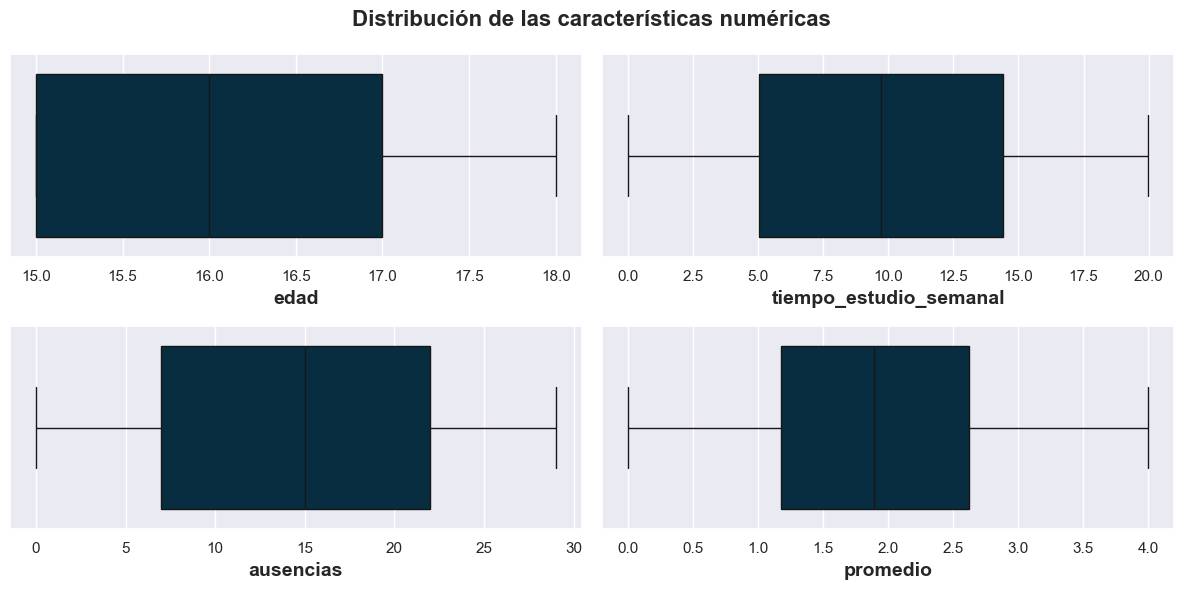

In [21]:
# Creamos la matriz de gráficas
# ======================================================
fig, axes = plt.subplots(2, 2, figsize=(12,6))

caracteristicas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(caracteristicas_numericas)):
    fila = i // 2
    columna = i % 2
    sns.boxplot(data= df, x= caracteristicas_numericas[i], ax= axes[fila, columna], palette= palette)
    axes[fila, columna].set_xlabel(caracteristicas_numericas[i], fontsize= 14, weight= 'bold')    
fig.suptitle('Distribución de las características numéricas', fontsize= 16, weight= 'bold')
fig.tight_layout()

De acuerdo con los diagramas de caja generados, no hay presencia de algún valor atípico en las variables numéricas de nuestro conjunto de datos.

## 1.4 Análisis Univariable

A continuación realizaremos un análisis univariable sobre cada una de las variables, por medio de resúmenes de datos y representaciones gráficas como histogramas.

In [22]:
# Obtenemos información general del DataFrame con el método info
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   edad                          2392 non-null   int64   
 1   genero                        2392 non-null   category
 2   etnia                         2392 non-null   category
 3   educacion_padres              2392 non-null   category
 4   tiempo_estudio_semanal        2392 non-null   float64 
 5   ausencias                     2392 non-null   int64   
 6   tutorias                      2392 non-null   category
 7   apoyo_padres                  2392 non-null   category
 8   extra_curricular_otro         2392 non-null   category
 9   extracurricular_deportes      2392 non-null   category
 10  extracurricular_musica        2392 non-null   category
 11  extracurricular_voluntariado  2392 non-null   category
 12  promedio                      2392 non-null   fl

Podemos observar que las categorías presentes en el DataFrame están correctamente identificadas por la librería de pandas. A continuación, procederemos a calcular los estadísticos descriptivos principales del conjunto de datos y realizaremos representaciones gráficas correspondientes.

__Estadísticos descriptivos principales y representaciones gráficas de las variables cuantitativas.__

In [23]:
# Hallamos los estadísticos descriptivos de las variables numéricas del DataFrame
# ==============================================================================

df.describe(include= [np.number])

,edad,tiempo_estudio_semanal,ausencias,promedio
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186
std,1.123798,5.652774,8.467417,0.915156
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803
50%,16.000000,9.705363,15.000000,1.893393
75%,17.000000,14.408410,22.000000,2.622216
max,18.000000,19.978094,29.000000,4.000000


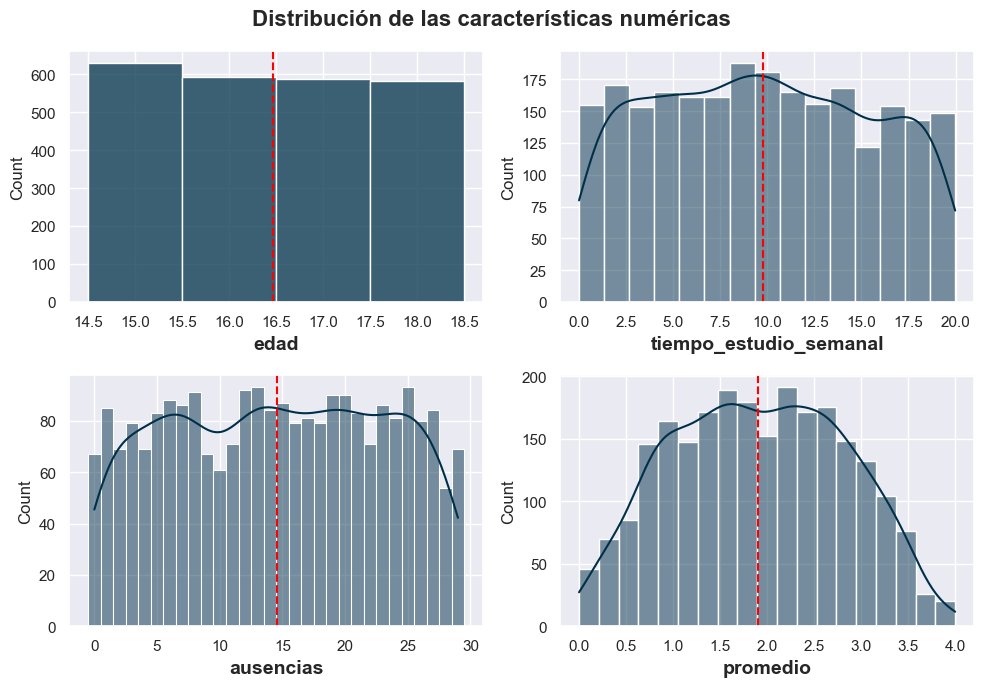

In [24]:
# Creamos la matriz de gráficas
# ======================================================

fig, axes = plt.subplots(2, 2, figsize=(10,7))

# Generamos un histograma para cada variable numérica del DataFrame 
# ==============================================================================

sns.histplot(data= df, x= 'edad', ax= axes[0,0], palette= palette, discrete= True)
sns.histplot(data= df, x= 'tiempo_estudio_semanal', kde= True, ax= axes[0,1], palette= palette)
sns.histplot(data= df, x= 'ausencias', kde= True, ax= axes[1,0], palette= palette, discrete= True)
sns.histplot(data= df, x= 'promedio', kde= True, ax= axes[1,1], palette= palette)


# Añadimos la media de cada variable numérica al histograma
# ==============================================================================

for i in range(len(caracteristicas_numericas)):
    fila = i // 2
    columna = i % 2
    axes[fila, columna].set_xlabel(caracteristicas_numericas[i], fontsize= 14, weight= 'bold')
    axes[fila, columna].axvline(df[caracteristicas_numericas[i]].mean(), color= 'red', linestyle= '--')
    
fig.suptitle('Distribución de las características numéricas', fontsize= 16, weight= 'bold')
fig.tight_layout()

De los estadísticos descriptivos y el análisis gráfico sobre las variables numéricas podemos observar lo siguiente:

- La edad de los estudiantes en el conjunto de datos varía desde los 15 años hasta los 18 años, con un promedio de 16.46 años. Podemos notar que tiene una distribución uniforme con una ligera concentración en los 15 años.

- El tiempo mínimo que los estudiantes dedican al estudio semanalmente es de 0.001057 horas, indicando que uno o más estudiantes prácticamente no dedican tiempo al estudio. Por otro lado, el máximo registrado es de 19.97 horas semanales, con un promedio de 9.77 horas semanales. De acuerdo con el análisis gráfico, presenta una leve concentración hacia la media.

- En cuanto a la variable de ausencias, se observa que hay estudiantes que no han faltado ningún día durante el curso. Sin embargo, el máximo de ausencias registradas es de 29, con un promedio de 14.54. Observamos que tiene una distribución mayormente uniforme, lo cual contrasta con lo generalmente esperado, que es una concentración de las ausencias en los valores más bajos, de forma que pocos estudiantes tendrían muchas ausencias.

- El promedio de calificaciones de los estudiantes muestra un mínimo de 0.0, lo cual es relevante para analizar posteriormente qué factores intervienen para obtener esta calificación mínima. Además, la calificación máxima registrada es de 4.0. El promedio general es de 1.9, lo cual es bastante bajo y corresponde a una nota de *F*. De acuerdo con el análisis gráfico, podemos observar que tiene una distribución que se asemeja ligeramente a la campana de Gauss, de forma que la mayoría de los datos están concentrados alrededor de la media.

__Estadísticos descriptivos principales de las variables cualitativas.__

In [25]:
# Hallamos los estadísticos descriptivos de las variables categóricas del DataFrame
# ==============================================================================

df.describe(include= 'category')

,genero,etnia,educacion_padres,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,calificacion
count,2392,2392,2392,2392,2392,2392,2392,2392,2392,2392
unique,2,4,5,2,5,2,2,2,2,5
top,femenino,caucasico,formacion_universitaria,no,moderado,no,no,no,no,F
freq,1222,1207,934,1671,740,1475,1666,1921,2016,1274


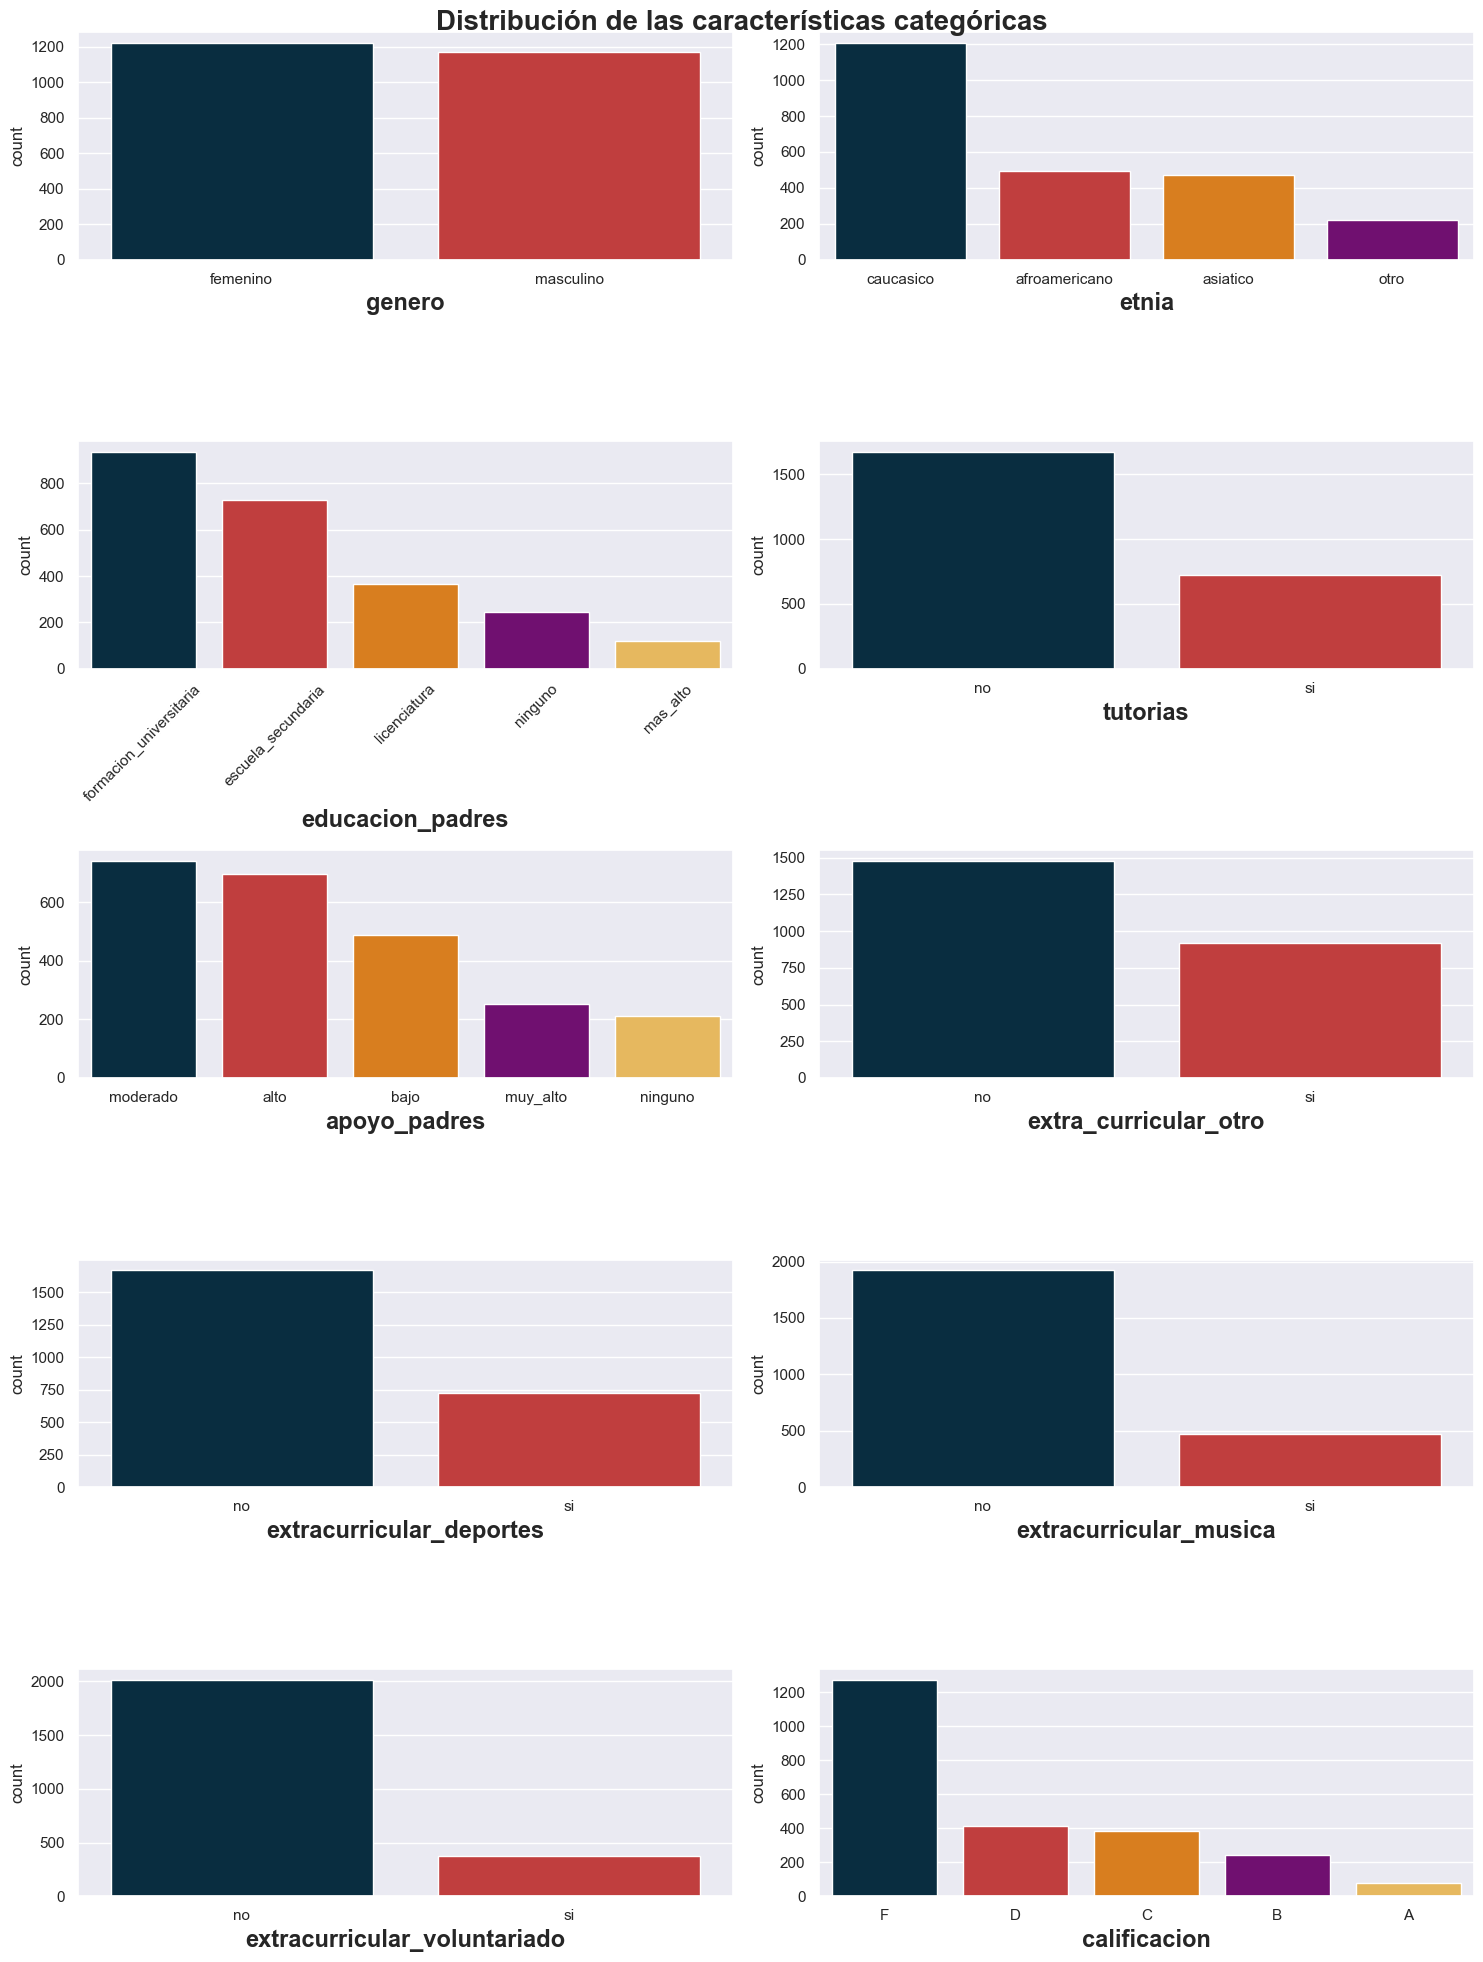

In [26]:
# Creamos la matriz de gráficas
# ======================================================

fig, axes = plt.subplots(5, 2, figsize=(15,20))

# Asignamos las columnas categóricas del DataFrame a la variable 'caracteristicas_categoricas'
# ==============================================================================

caracteristicas_categoricas = df.select_dtypes(include=['category']).columns

# Generamos un gráfico de barras para cada variable categórica del DataFrame
# ==============================================================================

for i in range(len(caracteristicas_categoricas)):
    fila = i // 2
    columna = i % 2
    sns.countplot(data= df, x= caracteristicas_categoricas[i], ax= axes[fila, columna], palette= palette, order= df[caracteristicas_categoricas[i]].value_counts().index)
    axes[fila, columna].set_xlabel(caracteristicas_categoricas[i], fontsize= 17, weight= 'bold')
    if caracteristicas_categoricas[i] == 'educacion_padres':
        axes[fila, columna].tick_params(axis= 'x', rotation= 45)
        
fig.suptitle('Distribución de las características categóricas', fontsize= 20, weight= 'bold')
fig.tight_layout()

De los estadísticos descriptivos y el análisis gráfico de las variables cualitativas podemos observar lo siguiente:

- El género que predomina en el conjunto de datos es el *Femenino*, aunque no hay una diferencia significativa con respecto al género *Masculino*.

- La etnia con mayor frecuencia es *Caucásico*, abarcando aproximadamente la mitad de todas las observaciones, seguida por *Afroamericana* y *Asiática*, que se encuentran muy igualadas. Por último, están los estudiantes pertenecientes a otras etnias.

- La mayoría de los padres tienen formación universitaria, con una frecuencia de 934 en el conjunto de datos. En segundo lugar se encuentra la escuela secundaria, seguida de la licenciatura y después ninguno. Hay muy pocos padres con una educación muy alta.

- La mayoría de los estudiantes no acceden a tutorías, ya que 1,671 de los 2,392 estudiantes no las utilizan.

- Predominan los padres que ofrecen un nivel de apoyo moderado a sus hijos, con una frecuencia de 740, seguido de alto. Hay pocos padres que ofrecen un nivel de apoyo muy alto, y asimismo, también hay muy pocos que no apoyan a sus hijos.

- La mayoría de los estudiantes no participan en ninguna actividad extracurricular, ya sea deportes, música, voluntariado u otras.

- La calificación que predomina entre los estudiantes es *F*, lo cual es una métrica importante a considerar, dado que es alarmante que la mayoría de los estudiantes estén reprobados. De acuerdo con el análisis gráfico, podemos observar que el orden de las frecuencias es inverso al deseado, pues la mayor cantidad de estudiantes recibe bajas notas, y tan solo unos pocos obtienen la calificación de "A" o "B".

## 1.5 Análisis Bivariado

A continuación, llevaremos a cabo un análisis bivariado para explorar las relaciones que puedan existir entre las variables. Una de las variables más importantes es el *promedio* de los estudiantes, por lo tanto, analizaremos esta variable respecto a las demás. Vamos a comenzar contrastando la variable *promedio* con respecto a las demás variables numéricas.


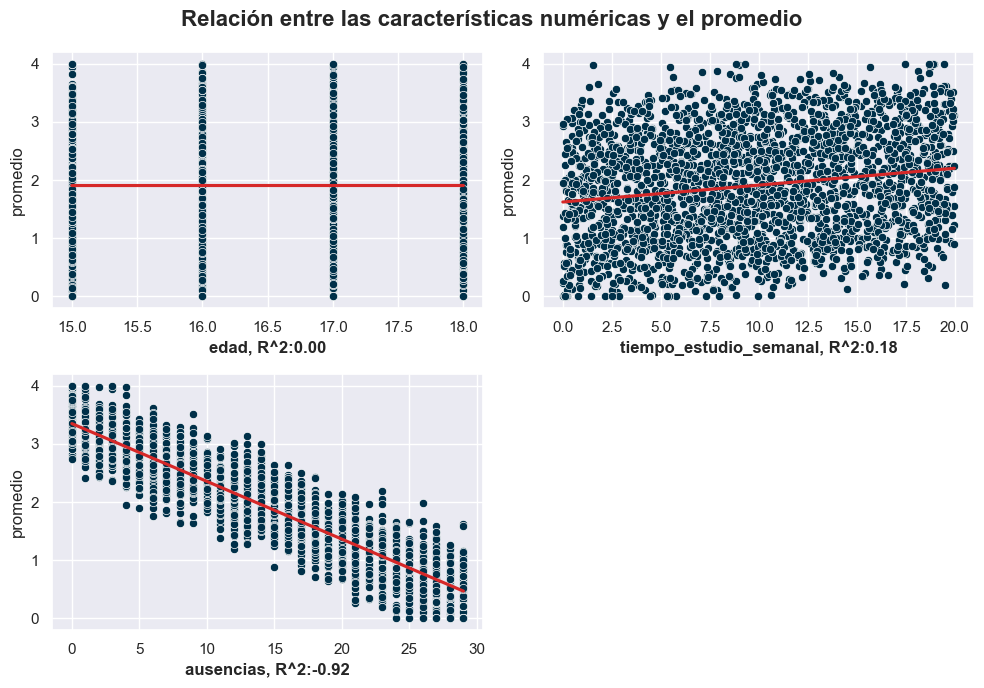

In [36]:
# Creamos la matriz de gráficas
# ======================================================

fig, axes = plt.subplots(2, 2, figsize=(10,7))

# Creamos un diagrama de dispersión para cada variable numérica del DataFrame en relación al promedio
# ==============================================================================

for i in range(len(caracteristicas_numericas.drop('promedio'))):
    fila = i // 2
    columna = i % 2
    sns.scatterplot(data= df, y= 'promedio', x= caracteristicas_numericas[i], ax= axes[fila, columna], palette= palette)
    sns.regplot(data= df, y = 'promedio', x= caracteristicas_numericas[i], ax= axes[fila, columna], scatter= False, ci= None, color= palette[1])
    axes[fila, columna].set_xlabel(f'{caracteristicas_numericas[i]}, R^2:{(pearsonr(df['promedio'], df[caracteristicas_numericas[i]])[0]):.2f}' , fontsize= 12, weight= 'bold')
    
fig.suptitle('Relación entre las características numéricas y el promedio', fontsize= 16, weight= 'bold')
fig.delaxes(axes[1,1])
fig.tight_layout()

Del análisis bivariado sobre las variables numéricas podemos observar lo siguiente:

- La edad no influye en el promedio obtenido por cada estudiante, ya que la relación entre las dos variables es prácticamente 0, de acuerdo con el coeficiente de correlación de Pearson.

- Existe una relación débil entre el tiempo de estudio y el promedio obtenido de cada estudiante. El coeficiente de correlación de Pearson es de 0.18, lo cual indica que el promedio está débilmente influido por el tiempo de estudio.

- Existe una relación fuerte negativa entre las ausencias y el promedio de cada estudiante, de forma que a mayor cantidad de ausencias, el estudiante presentará un promedio menor. El coeficiente de correlación de Pearson establece un valor de -0.92, lo que confirma que existe una relación negativa fuerte entre las dos variables.


Ahora vamos a realizar el análisis de las variables cualitativas con respecto a la variable *promedio*.

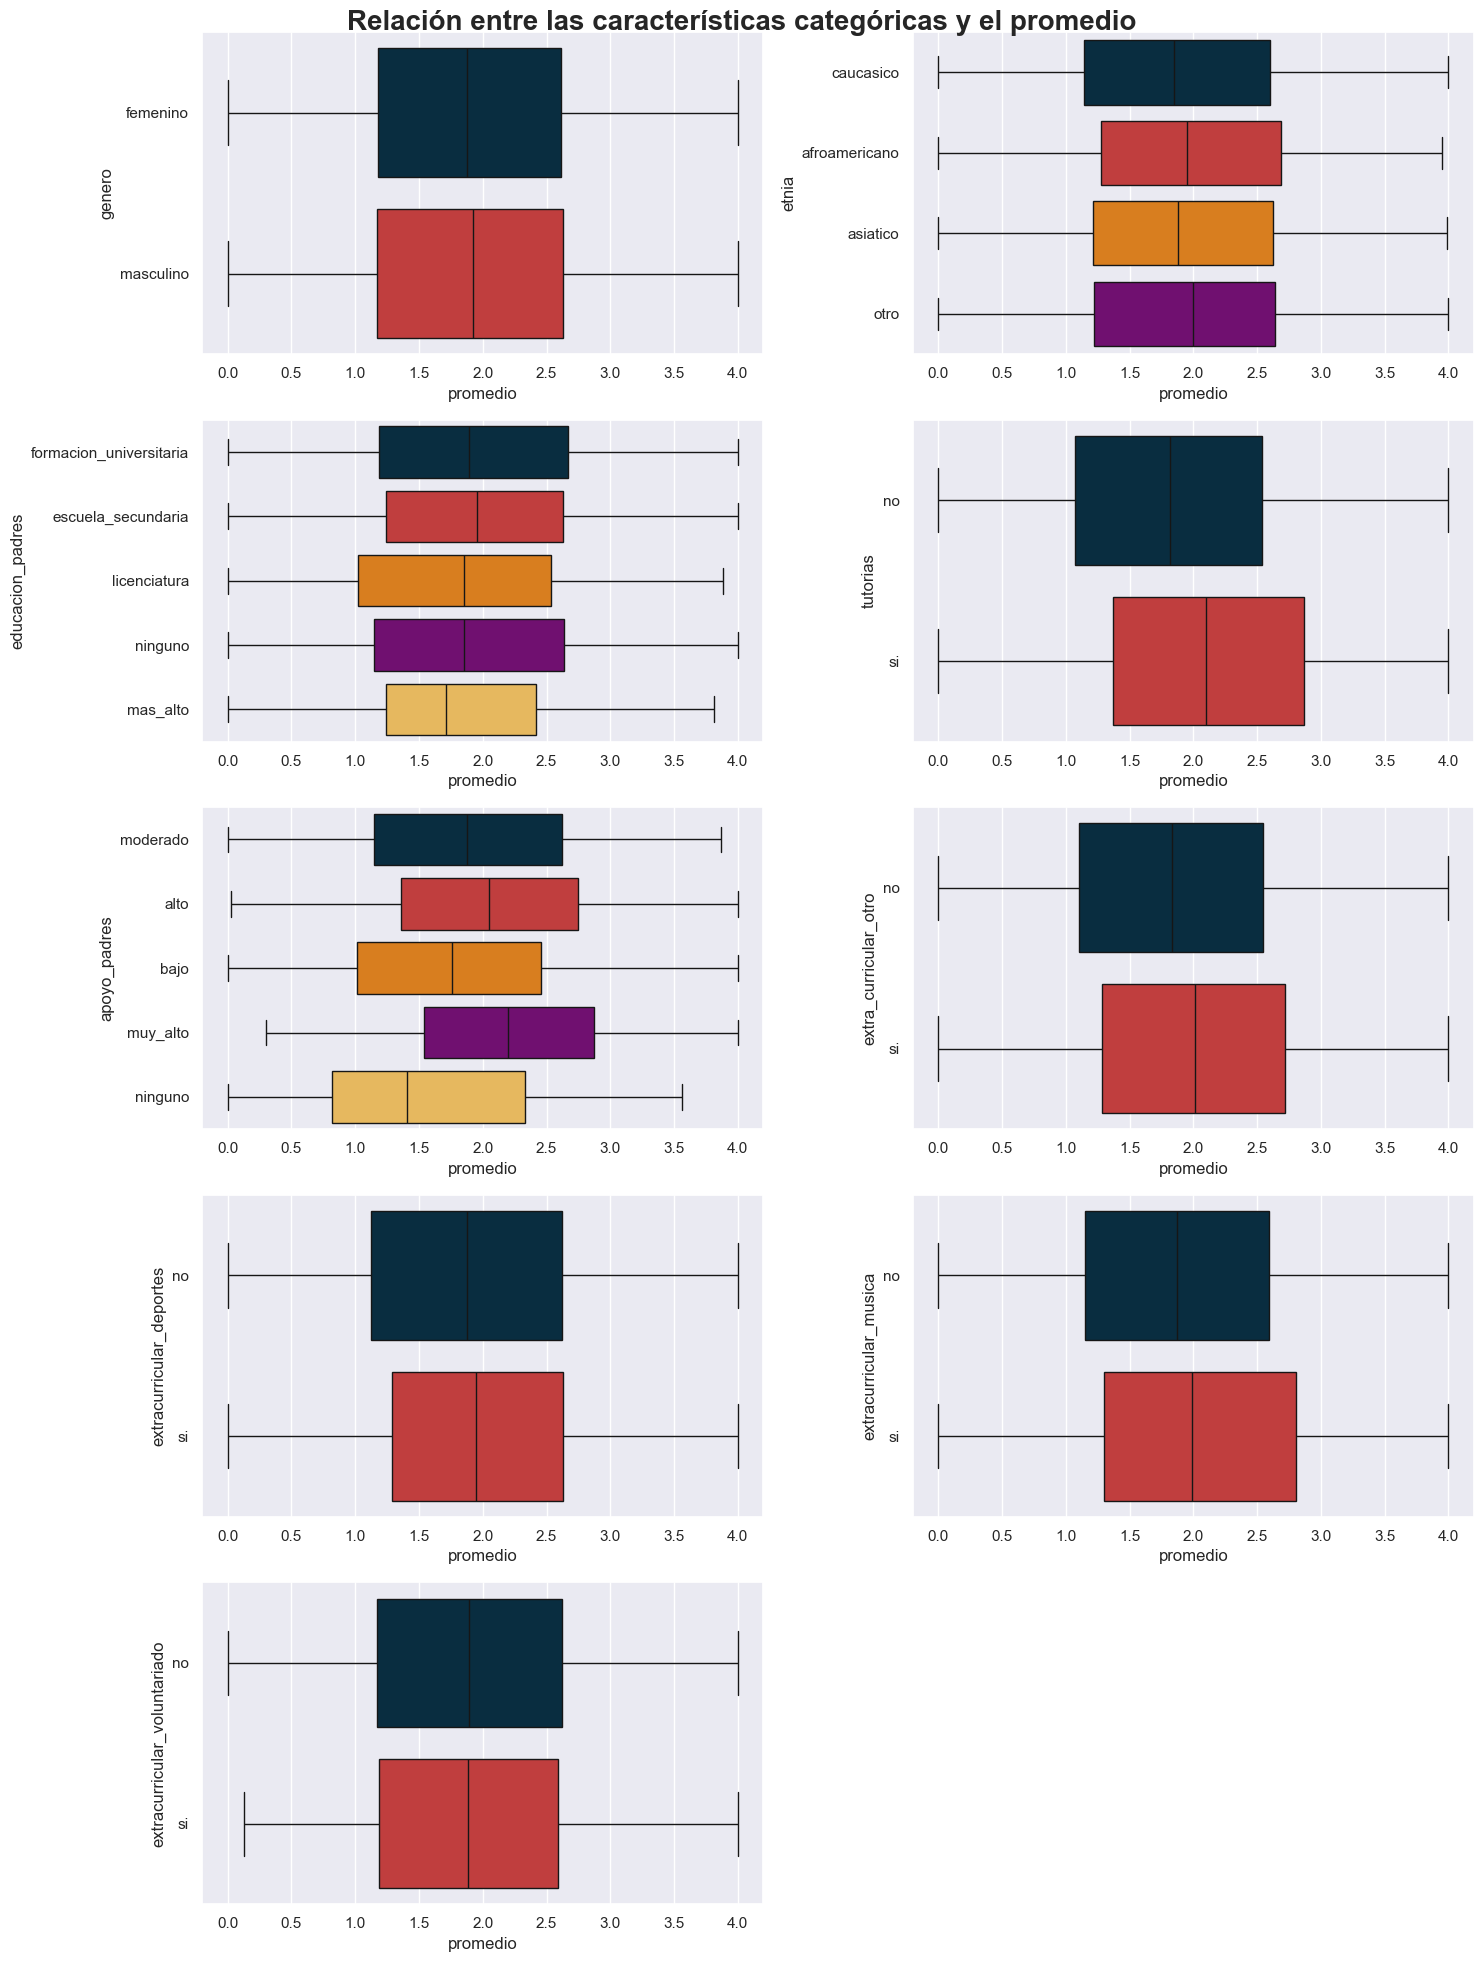

In [28]:
# Creamos la matriz de gráficas
# ======================================================

fig, axes = plt.subplots(5, 2, figsize=(15,20))

for i in range(len(caracteristicas_categoricas.drop('calificacion'))):
    fila = i // 2
    columna = i % 2
    sns.boxplot(data= df, x= 'promedio', y= caracteristicas_categoricas[i], ax= axes[fila, columna], palette= palette, order= df[caracteristicas_categoricas[i]].value_counts().index)
fig.delaxes(axes[4,1])
fig.suptitle('Relación entre las características categóricas y el promedio', fontsize= 20, weight= 'bold')
fig.tight_layout()

Del análisis multivariado podemos observar que hay algunos grupos que tienen una diferencia notable entre los promedios segmentados por factores como el apoyo de los padres y las tutorías. Sin embargo, hay otras variables en las que las diferencias no son tan significativas. Es relevante calcular cuáles diferencias son estadísticamente significativas y cuáles se deben a la variación aleatoria de los datos. Para ello, disponemos de pruebas de hipótesis que nos permiten comprobar esto.

El T-test es una prueba que compara si las medias entre dos poblaciones son significativamente diferentes y no se basan en la simple aleatoriedad de los datos. Este test asume que los datos tienen una distribución normal, sin embargo, en la práctica se considera un test muy robusto que puede ser utilizado en distribuciones que no siguen una forma normal si el tamaño de la muestra es mayor a 30 (de acuerdo con el teorema del límite central).

Otro test es el de Mann-Whitney U, que es una prueba no paramétrica utilizada para comparar dos muestras independientes y determinar si provienen de la misma distribución. La hipótesis nula e hipótesis alternativa que maneja el test son:

- Hipótesis Nula ($H_0$): No hay diferencia en la distribución de los rangos entre las dos muestras independientes. Esto implica que la probabilidad de que una observación de la población X tenga un valor mayor que una observación de la población Y es igual a la probabilidad de que una observación de Y sea mayor que una observación de X.

- Hipótesis Alternativa ($H_a$): Existe una diferencia en la distribución de los rangos entre las dos muestras.

Además, cabe resaltar que el umbral que vamos a utilizar para la prueba de significancia será de 0.05, de forma que si un p_value se encuentra por debajo de este umbral, habrá suficiente evidencia para rechazar la hipótesis nula en favor de la hipótesis alternativa. Esto lo haremos sobre las variables que tienen solo dos categorías, las cuales son: género, tutorías, extracurricular_otro, extracurricular_deportes, extracurricular_música, extracurricular_voluntariado.

In [29]:
# Realizamos el test de Mann-Whitney para cada variable categórica con respecto al promedio
# ==============================================================================

caracteristicas = ['tutorias', 'extra_curricular_otro', 'extracurricular_deportes', 'extracurricular_musica', 'extracurricular_voluntariado']

u_statistic, p_value = stats.mannwhitneyu(x=df['promedio'][df['genero'] == 'masculino'], y=df['promedio'][df['genero'] == 'femenino'], alternative='two-sided')

print(f'El test de Mann-Whitney para la variable género con respecto al promedio es:')
print(f'Estadístico U: {u_statistic}, P-valor: {p_value} \n')

for i in caracteristicas:
    u_statistic, p_value = stats.mannwhitneyu(x=df['promedio'][df[i] == 'si'], y=df['promedio'][df[i] == 'no'], alternative='two-sided')
    print(f'El test de Mann-Whitney para la variable {i} con respecto al promedio es:')
    print(f'Estadístico U: {u_statistic}, P-valor: {p_value} \n')

El test de Mann-Whitney para la variable género con respecto al promedio es:
Estadístico U: 726727.5, P-valor: 0.4825496015386245 

El test de Mann-Whitney para la variable tutorias con respecto al promedio es:
Estadístico U: 704807.5, P-valor: 3.9186762975512515e-11 

El test de Mann-Whitney para la variable extra_curricular_otro con respecto al promedio es:
Estadístico U: 745757.5, P-valor: 2.3376749766031573e-05 

El test de Mann-Whitney para la variable extracurricular_deportes con respecto al promedio es:
Estadístico U: 643624.5, P-valor: 0.012330096717957333 

El test de Mann-Whitney para la variable extracurricular_musica con respecto al promedio es:
Estadístico U: 497576.0, P-valor: 0.0007696083120160927 

El test de Mann-Whitney para la variable extracurricular_voluntariado con respecto al promedio es:
Estadístico U: 379547.0, P-valor: 0.9650644899474574 



Como podemos observar, no existe una diferencia significativa entre los promedios de género masculino y femenino, de forma que la variación observada es producto de la variación aleatoria de los datos. Asimismo, podemos observar que la participación en actividades extracurriculares de voluntariado tampoco indica una mejora en el rendimiento académico, en contraste con otras actividades extracurriculares que sí representan una mejora significativa. Por otro lado, los estudiantes que reciben tutorías obtienen una mejora en el rendimiento académico.

Ahora, vamos a comparar el tamaño del efecto de los grupos que sí representan una mejora en el rendimiento académico del estudiante. El tamaño del efecto de estas mejoras lo podemos determinar mediante la medida Cohen's d. Para que esta medida sea válida, las poblaciones que estamos comparando deben presentar varianzas similares, lo cual podemos comprobar a través del test de Fligner-Killeen, que tiene las siguientes hipótesis nula y alternativa:

- **Hipótesis Nula ($H_0$):** Establece que la varianza es constante entre los grupos o condiciones. En otras palabras, todas las muestras tienen la misma varianza poblacional, lo que indica homocedasticidad.

- **Hipótesis Alternativa ($H_a$):** Al menos una de las varianzas de las muestras es diferente. Esto implica que al menos dos de las muestras tienen varianzas poblacionales distintas, lo que indica heterocedasticidad.

In [30]:
#  Realizamos el test de Fligner-Killeen
# ================================================================

caracteristicas = ['tutorias', 'extra_curricular_otro', 'extracurricular_deportes', 'extracurricular_musica']

for i in caracteristicas:
        estadistico, pvalue = stats.fligner(df['promedio'][df[i] == 'si'], df['promedio'][df[i] == 'no'], center='median')
        if pvalue < 0.05:
            print(f'la variable {i} no tiene varianzas iguales con un pvalue de {pvalue}')
        else:
            print(f'la variable {i} tiene varianzas iguales con un pvalue de {pvalue}')


la variable tutorias tiene varianzas iguales con un pvalue de 0.9880629745668346
la variable extra_curricular_otro tiene varianzas iguales con un pvalue de 0.5994815098515693
la variable extracurricular_deportes tiene varianzas iguales con un pvalue de 0.5172767403022771
la variable extracurricular_musica tiene varianzas iguales con un pvalue de 0.9759296215378569


Una vez comprobado que los grupos presentan varianzas similares, podemos calcular la medida de Cohen's d para determinar el tamaño del efecto en cada uno de los grupos:

In [31]:
# Hallamos la medida de Cohen's d"
# ===============================================================

for i in caracteristicas:
    grupo1 = df['promedio'][df[i] == 'si']
    grupo2 = df['promedio'][df[i] == 'no']
    media1 = np.mean(grupo1)
    media2 = np.mean(grupo2)
    std1 = np.std(grupo1, ddof=1)
    std2 = np.std(grupo2, ddof=1)
    n1, n2 = len(grupo1), len(grupo2)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    cohen_d = (media1 - media2) / pooled_std
    print(f"el tamaño de efecto Cohen's d para la variable {i} es: {cohen_d}")

el tamaño de efecto Cohen's d para la variable tutorias es: 0.3194990494945019
el tamaño de efecto Cohen's d para la variable extra_curricular_otro es: 0.19427587677883315
el tamaño de efecto Cohen's d para la variable extracurricular_deportes es: 0.1260008467694183
el tamaño de efecto Cohen's d para la variable extracurricular_musica es: 0.18479337470478335


De aquí podemos extraer información valiosa para la toma de decisiones ya que podemos observar:

- No hay diferencia en el rendimiento académico de los estudiantes de acuerdo con su género. Asimismo, no hay ninguna diferencia estadísticamente significativa en el rendimiento de los estudiantes que realizan la actividad extracurricular de voluntariado frente a los que no lo hacen.

- Los estudiantes que participan en una actividad extracurricular diferente al voluntariado sí perciben mejoras estadísticamente significativas en el rendimiento académico.

- Las tutorías son las que presentan el mayor efecto positivo en el rendimiento académico del estudiante, seguidas por las actividades extracurriculares diferentes al voluntariado y los deportes. Por último, la que representa el menor tamaño de efecto, es decir, que presenta una mejoría pequeña, es si el estudiante practica algún deporte o no.

Ahora, con respecto a las variables que presentan varias categorías, podemos utilizar el test de Kruskal-Wallis, que se emplea para determinar si hay diferencias significativas entre tres o más grupos independientes cuando los datos no cumplen con los supuestos de normalidad. Las hipótesis nula y alternativa de este test son:

- **Hipótesis nula ($H_0$)**: Las medianas de todos los grupos son iguales. No hay diferencias significativas entre las medianas de los grupos que se están comparando.

- **Hipótesis alternativa ($H_1$)**: Al menos una de las medianas de los grupos es diferente. Existen diferencias significativas entre las medianas de al menos dos de los grupos que se están comparando.

In [32]:
# Hallamos el tst Kruskal-Wallis
# ================================================================

estadisticos_krustal = {}
estadisticos_krustal['etnia'] = (stats.kruskal(df['promedio'][df['etnia'] == 'caucasico'], df['promedio'][df['etnia'] == 'afroamericano'], df['promedio'][df['etnia'] == 'asiatico'], df['promedio'][df['etnia'] == 'otro'])[1])
estadisticos_krustal['apoyo_padres'] = stats.kruskal(df['promedio'][df['apoyo_padres'] == 'ninguno'], df['promedio'][df['apoyo_padres'] == 'bajo'], df['promedio'][df['apoyo_padres'] == 'moderado'], df['promedio'][df['apoyo_padres'] == 'alto'], df['promedio'][df['apoyo_padres'] == 'muy_alto'])[1]
estadisticos_krustal['educacion_padres'] = stats.kruskal(df['promedio'][df['educacion_padres'] == 'ninguno'], df['promedio'][df['educacion_padres'] == 'escuela_secundaria'], df['promedio'][df['educacion_padres'] == 'formacion_universitaria'], df['promedio'][df['educacion_padres'] == 'licenciatura'], df['promedio'][df['educacion_padres'] == 'mas_alto'])[1]

for i in estadisticos_krustal.keys():
    if estadisticos_krustal[i] < 0.05:
        print(f'La variable {i} tiene una diferencia significativa con un pvalue de {estadisticos_krustal[i]}')
    else:
        print(f'La variable {i} no tiene una diferencia significativa con un pvalue de {estadisticos_krustal[i]}')

La variable etnia no tiene una diferencia significativa con un pvalue de 0.3557201952308704
La variable apoyo_padres tiene una diferencia significativa con un pvalue de 8.140314082661161e-16
La variable educacion_padres no tiene una diferencia significativa con un pvalue de 0.1606174191114544


Podemos observar que en las variables que presentan varias categorías, como son etnia, apoyo de los padres y educación de los padres, la única que muestra una diferencia estadísticamente significativa entre los grupos es el apoyo de los padres

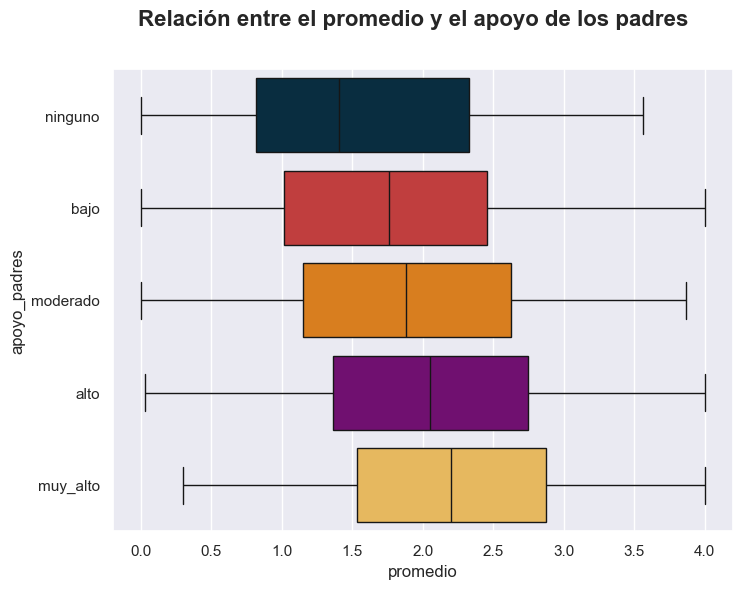

In [33]:
# Creamos un gráfico de caja para la variable apoyo_padres
# ==============================================================================

fig, axes = plt.subplots(1, 1, figsize=(8,6))
sns.boxplot(data =df, x= 'promedio', y= 'apoyo_padres', palette= palette, order= ['ninguno', 'bajo', 'moderado', 'alto', 'muy_alto'])
fig.suptitle('Relación entre el promedio y el apoyo de los padres', fontsize= 16, weight= 'bold');

Conforme aumenta el apoyo de los padres, también aumenta el rendimiento académico del estudiante. Vamos a calcular si existe una diferencia estadísticamente significativa entre no recibir ningún apoyo de los padres y recibir un apoyo bajo.

In [34]:
# Calculamos el test de mannwhitney para la variable apoyo_padres con respecto al promedio 
# ==============================================================================

stats.mannwhitneyu(x=df['promedio'][df['apoyo_padres'] == 'ninguno'], y=df['promedio'][df['apoyo_padres'] == 'bajo'], alternative='two-sided')

MannwhitneyuResult(statistic=44896.0, pvalue=0.004845765743466664)

Si existe una diferencia estadísticamente significativa entre no recibir apoyo de los padres y recibir un apoyo bajo, vamos a calcular el tamaño del efecto mediante la medida de Cohen's d.

In [35]:
# Calculamos el tamaño de efecto D de Cohen para la variable apoyo_padres
# ==============================================================================

grupo1 = df['promedio'][df['apoyo_padres'] == 'bajo']
grupo2 = df['promedio'][df['apoyo_padres'] == 'ninguno']
media1 = np.mean(grupo1)
media2 = np.mean(grupo2)
std1 = np.std(grupo1, ddof=1)
std2 = np.std(grupo2, ddof=1)
n1, n2 = len(grupo1), len(grupo2)
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
cohen_d = (media1 - media2) / pooled_std
print(f"el tamaño de efecto Cohen's d para la variable apoyo_padres es: {cohen_d}")

el tamaño de efecto Cohen's d para la variable apoyo_padres es: 0.23915896122571154


# Conclusiones

Del analisis realizado podemos concluir lo siguiente:

- Ninguna variable del conjunto de datos presenta valores atípicos; todos los datos están completos.

- Las distribuciones de las variables cuantitativas son mayormente uniformes, aunque las variables de promedio y tiempo de estudio muestran una ligera concentración alrededor de la media.

- La mayoría étnica predominante en el conjunto de datos es la caucásica, seguida por los afroamericanos y los asiáticos que tienen cantidades similares. Sin embargo, el análisis no muestra evidencia que respalde que pertenecer a una etnia en particular mejore el rendimiento del estudiante.

- La mayoría de los padres de los estudiantes tienen algún nivel de educación universitaria, seguidos por aquellos con educación hasta secundaria y luego los licenciados. Es notable que el número de padres sin educación formal duplica a los de una educación superior a la universitaria, pero la educación de los padres no parece influir en el rendimiento de los estudiantes.

- La mayoría de los estudiantes no utilizan las tutorías ofrecidas, pero el análisis indica que estas sí mejoran el rendimiento académico. Por lo tanto, es necesario implementar estrategias que faciliten y motiven el acceso de los estudiantes a las tutorías.

- El apoyo de los padres influye significativamente en el rendimiento académico de los estudiantes. Incluso un nivel de apoyo bajo muestra mejoras comparado con no recibir apoyo alguno. Se recomienda implementar estrategias que fomenten la participación de los padres en la educación de sus hijos, aumentando progresivamente este apoyo.

- La mayoría de los estudiantes no participan en actividades extracurriculares. Es relevante destacar que la única actividad extracurricular que no muestra una mejora significativa en el rendimiento es el voluntariado. Se sugiere integrar a los estudiantes en otras actividades extracurriculares, como la música, que sí demuestran impactos positivos en el rendimiento académico.

- La edad no tiene una influencia significativa en el rendimiento de los estudiantes, ya que el coeficiente de correlación de Pearson entre edad y rendimiento es de cero, indicando ausencia de relación entre estas variables.

- El tiempo de estudio tiene un leve impacto en el promedio de los estudiantes, a pesar de la falta de una relación directa evidente. El coeficiente de correlación de Pearson de 0.18 sugiere que el efecto del tiempo de estudio en el promedio es modesto.

- Las ausencias escolares juegan un papel crucial en el rendimiento de los estudiantes. A medida que aumentan las ausencias, el promedio del estudiante tiende a disminuir. El coeficiente de correlación de Pearson de -0.92 indica una relación fuertemente negativa, lo que significa que las ausencias explican el 92% de las variaciones en el promedio de los estudiantes. Es esencial implementar medidas para reducir las ausencias y reconsiderar las estrategias de evaluación, las cuales se ven considerablemente afectadas por las inasistencias.


# Referencias Bibliográficas

- Minguillón, J. Casas, J. y Minguillón, J. (2017). Minería de datos: modelos y algoritmos. Editorial UOC. 

- Garriga Trillo, A. J. (2009). Introducción al análisis de datos. UNED - Universidad Nacional de Educación a Distancia.

- Romero Villafranca, R. y Zúnica Ramajo, L. (2020). Métodos estadísticos para ingenieros. Editorial de la Universidad Politécnica de Valencia.

- David Julian. (2016). Designing Machine Learning Systems with Python. Packt Publishing.

